## Importing the libraries

In [3]:
import keras

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

#we can download he dataset from the given path of data above

In [28]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

##we have 6k images 28 rows and 28 columns

In [22]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [30]:
x_train[0] #it will give the numeric format data of our images it will hace 28 rows and 28 columns

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [32]:
## the data set 0 means white ans 255 will has black coloue

In [34]:
y_train[0]

9

In [ ]:
## the above 

In [50]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
i = 3  # sample index (change it to check different images)
print(f"Label: {y_train[i]}, Class: {class_names[y_train[i]]}")

Label: 3, Class: Dress


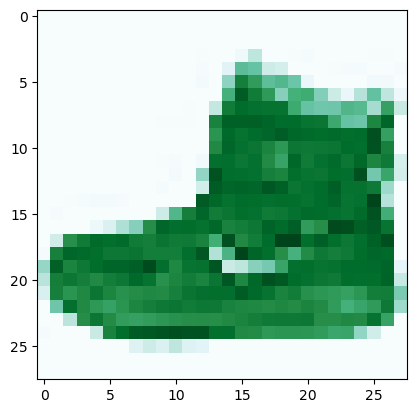

In [60]:
plt.imshow(x_train[0],cmap="BuGn")

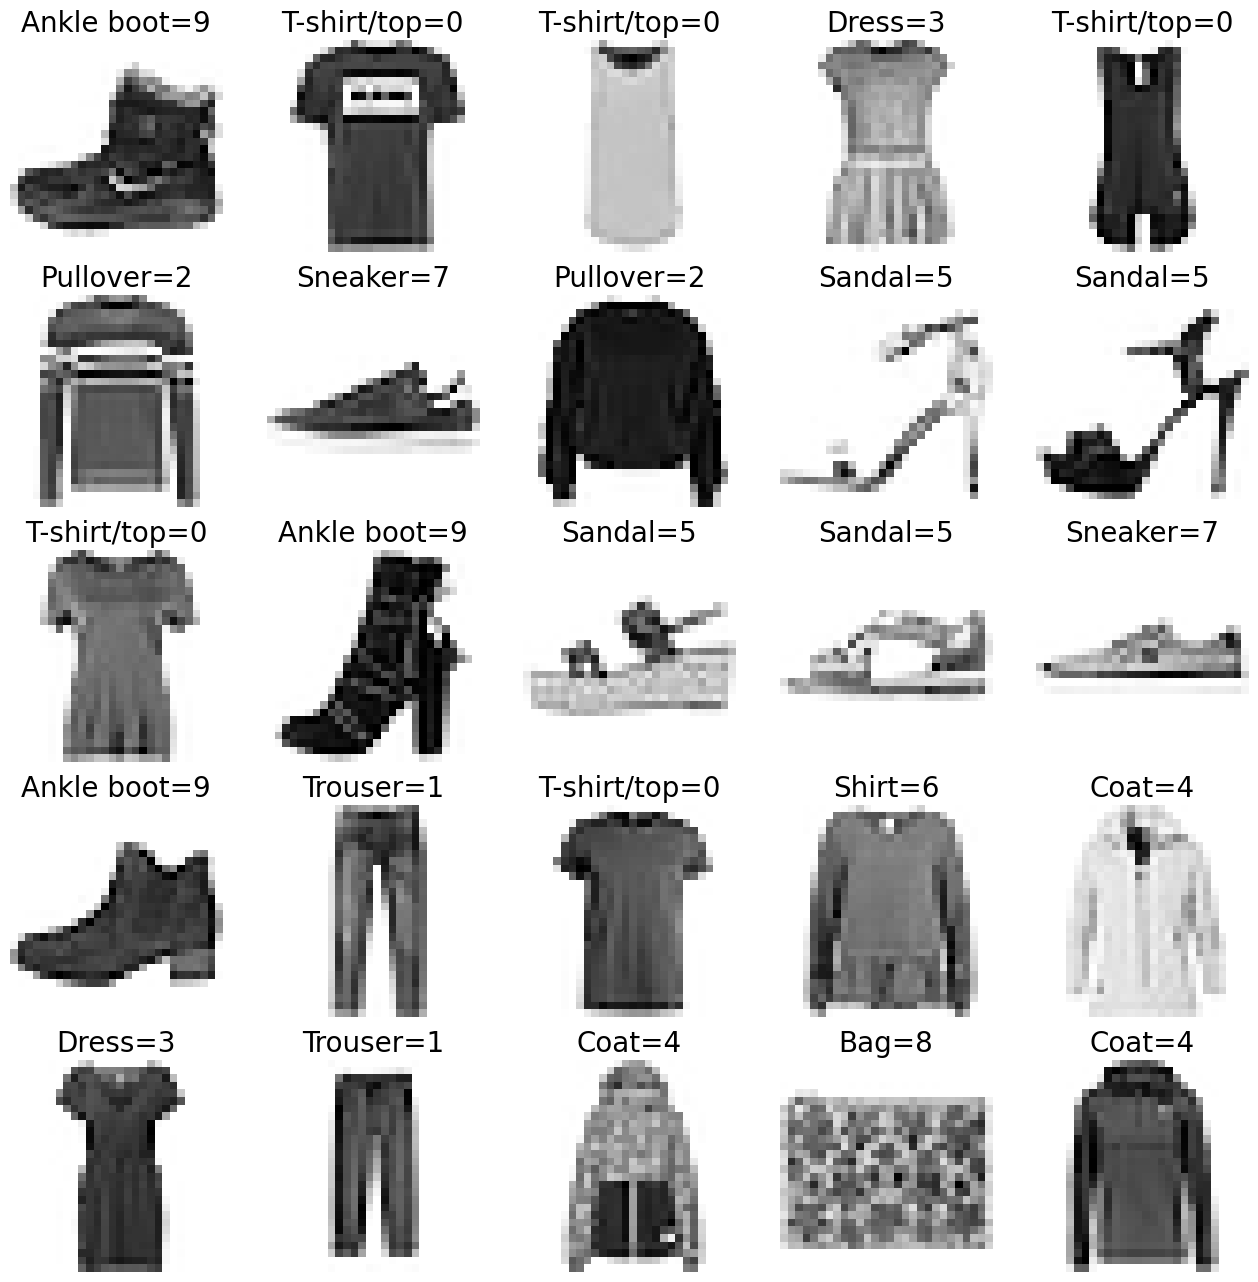

In [66]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap="Greys")
    plt.axis("off")
    plt.title(class_names[y_train[i]]+"="+str(y_train[i]),fontsize=20)

## Feature Scalling

##0-255 we have to normalise these values between 0 to 1

In [70]:
x_train= x_train/255
x_test=x_test/255

In [72]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build Neural Network

In [79]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
                        
                        
                        ])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
## to conver the dataset Flatten (1 D array)
#making the input 32 layes which train our model,
#activation fuction (relu) classifies the +ve and _ve and 0 values of output.
#for output layer we take 10 layers ,activation function (softmax) will give the probability of each neutal network .

In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [91]:
model.fit(x_train,y_train,epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7567 - loss: 0.7143


In [97]:
model.fit(x_train,y_train,epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8924 - loss: 0.2965
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8925 - loss: 0.2950
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8956 - loss: 0.2859
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.2864
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8999 - loss: 0.2706
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.2740
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9011 - loss: 0.2655


## Test and Evaluate Neural Network Model

In [102]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8796 - loss: 0.3548


[0.35462164878845215, 0.8769000172615051]

In [106]:
# our model trainingg data have 90 % of accuracy and our test model have accuracy 87%.


In [110]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [112]:
y_pred[0]

array([8.0045375e-08, 2.4018917e-07, 4.2770682e-07, 3.6726465e-07,
       1.4471260e-06, 2.4202909e-02, 4.1602430e-06, 1.9612405e-02,
       5.0558406e-04, 9.5567232e-01], dtype=float32)

In [114]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
      dtype=float32)

In [116]:
#the above predicts the 9th no index

In [120]:
np.argmax(y_pred[0].round(2))

9

In [122]:
y_test[0]

9

In [124]:
## model predected value and the actual value is same

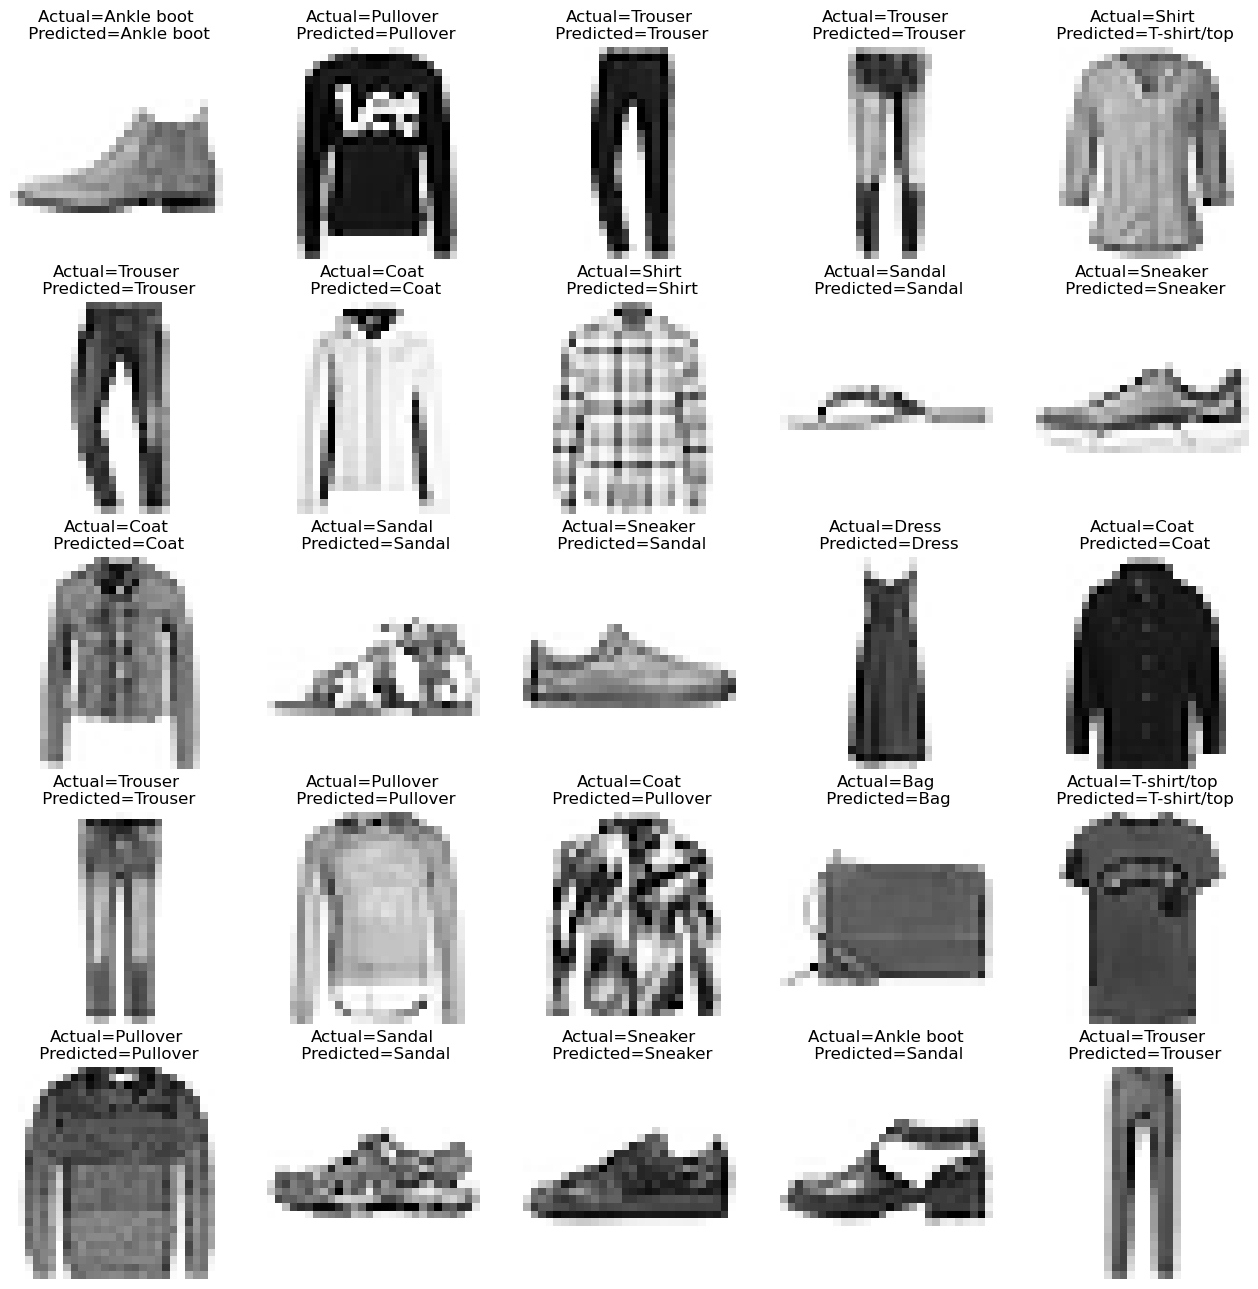

In [130]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i],cmap="Greys")
    plt.axis("off")
    plt.title("Actual={}\n Predicted={}".format(class_names[y_test[i]],class_names[np.argmax(y_pred[i])]))

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])


In [138]:
cm

array([[871,   3,  14,  11,   6,   3,  82,   0,  10,   0],
       [  7, 963,   0,  22,   4,   0,   3,   0,   1,   0],
       [ 21,   1, 781,   7, 113,   0,  75,   0,   2,   0],
       [ 71,   8,  10, 853,  30,   1,  22,   0,   5,   0],
       [  0,   1,  84,  34, 822,   1,  56,   0,   2,   0],
       [  0,   0,   0,   1,   0, 958,   0,  26,   3,  12],
       [153,   1,  91,  20,  77,   0, 650,   0,   8,   0],
       [  0,   0,   0,   0,   0,  22,   0, 959,   1,  18],
       [  4,   0,   4,   4,   7,   3,   9,   3, 966,   0],
       [  0,   0,   0,   0,   0,  12,   1,  40,   1, 946]], dtype=int64)

<Axes: >

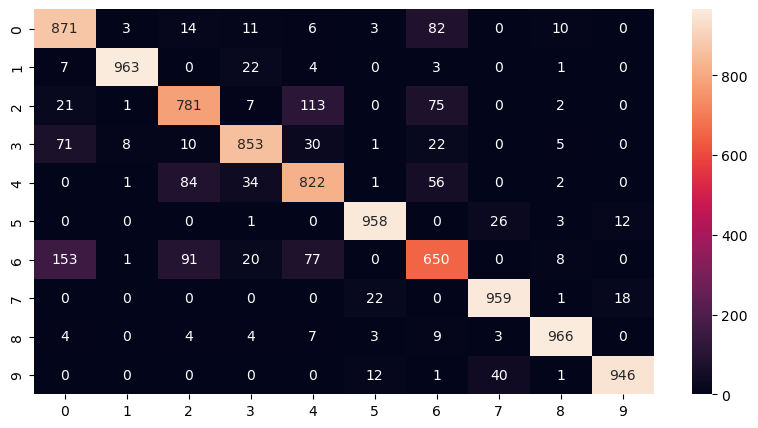

In [144]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')

In [148]:
# 0-9 is our classes 0 level data quantity is 871,it is cofused between 0 and 6 index . 

## Classification Report

In [155]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,[np.argmax(i) for i in y_pred],target_names=class_names)

In [161]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.87      0.82      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.79      0.78      0.79      1000
       Dress       0.90      0.85      0.87      1000
        Coat       0.78      0.82      0.80      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.72      0.65      0.68      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
## save Model